In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [8]:
# configuration
length = 50
max_iter = 1000

# variables
alpha = 10.0
delta_x = 1
delta_t = (delta_x ** 2) / (alpha * 4)
gamma = (alpha * delta_t) / (delta_x ** 2)

# initial condition
u_init = 0.0
u_top = 100.0
u_left = 0.0
u_bottom = 0.0
u_right = 0.0
u = np.empty((max_iter, length, length))
u.fill(u_init)

# boundary condition
u[:, (length-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, (length-1):] = u_right

In [9]:
def calc(u):
    for k in range(0, max_iter-1, 1):
        for i in range(1, length-1, delta_x):
            for j in range(1, length-1, delta_x):
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]
    
    return u

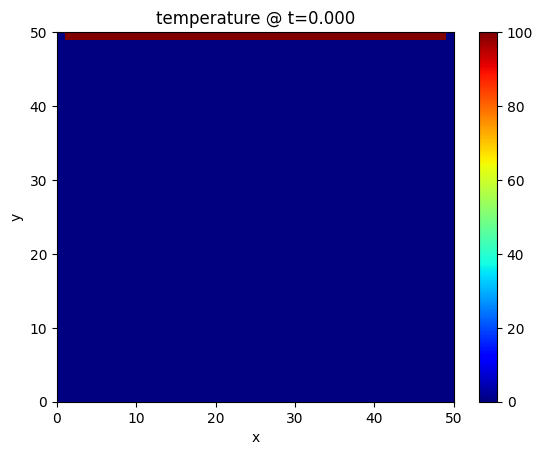

In [ ]:
def plot_heatmap(u_k, k):
    plt.clf()
    plt.title(f'temperature @ t={k*delta_t:.3f}')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()

    return plt

def animate(k):
    plot_heatmap(u[k], k)

ani = FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter//10, repeat=False)
HTML(ani.to_jshtml())

# References
- https://levelup.gitconnected.com/solving-2d-heat-equation-numerically-using-python-3334004aa01a